In [1]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions

In [2]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t))
    x[1]=x0
    for i=1:length(t)-1
        x0=x0-(x0*γ*Δt)+(sqrt(2*Δt)*randn())
        @inbounds x[1+i]=x0
    end
    return x
end

OUH (generic function with 1 method)

 16.256518 seconds (12.29 M allocations: 614.982 MiB, 1.71% gc time)


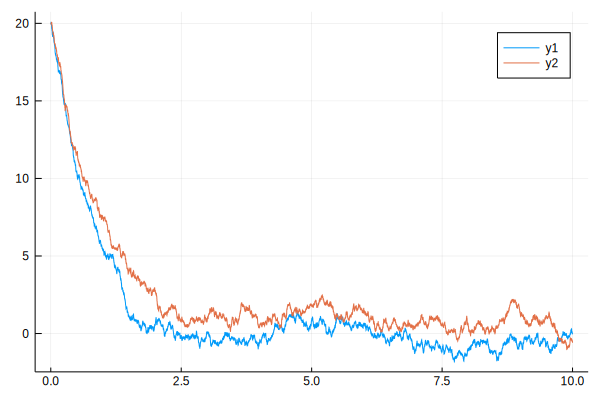

In [3]:
@time begin
    Δt=0.001
    N=10.0
    x0=20.0
    γ=1.0
    t=0:Δt:N
    K=OUH(x0,γ,t,Δt)
    T=OUH(x0,γ,t,Δt);
    plot(t,K)
    plot!(t,T)
end

In [4]:
i=100
Δs=Δt
R=diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)+0.5*diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)^2


3×3 Array{Float64,2}:
  0.99984       0.0179072  0.000165334
 -0.0179072     0.999669   0.0184655  
  0.000165334  -0.0184655  0.99983    

In [5]:
function eigen2(n::Int64,K::Array{Float64,1},T::Array{Float64,1},Δs::Float64) 
    R=diagm(0 =>ones(3))
    for i=1:n
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)+(0.5*diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)^2))*R
    end
    eigen(R)
end

eigen2 (generic function with 1 method)

In [6]:
@time begin
    γ=1.0
    x0=0.0
    Δt=0.1
    N=12
    t=0:Δt:N
    Δs=Δt
    K=OUH(x0,γ,t,Δt)
    T=OUH(x0,γ,t,Δt)
    F=eigen2(length(t),K,T,Δs)
end

  2.206817 seconds (1.83 M allocations: 91.037 MiB, 2.22% gc time)


Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
3-element Array{Complex{Float64},1}:
 -0.8769676956558325 - 0.4973047625088533im
 -0.8769676956558325 + 0.4973047625088533im
  1.0072095217104788 + 0.0im               
eigenvectors:
3×3 Array{Complex{Float64},2}:
  0.104769+0.504301im   0.104769-0.504301im  0.685837+0.0im
  0.110062-0.496159im   0.110062+0.496159im  0.695616+0.0im
 -0.690229-0.0im       -0.690229+0.0im       0.213884+0.0im

In [7]:
function lam_eigenvals(γ::Float64,x0::Float64,Δt::Float64,t::AbstractArray,Δs::Float64,tiradas::Int64)
    λ=Vector{Complex{Float64}}(undef,3*tiradas)
    for i=1:tiradas
        K=OUH(x0,γ,t,Δt)
        T=OUH(x0,γ,t,Δt)
        a=eigen2(length(t),K,T,Δs).values
        @inbounds λ[3*i-2]=a[1]
        @inbounds λ[3*i-1]=a[2]
        @inbounds λ[3*i-0]=a[3]
    end
    return λ
end

lam_eigenvals (generic function with 1 method)

In [8]:
γ=1.0
tiradas=500
x0=20.0
Δt=0.001
N=2
t=0:Δt:N
Δs=Δt
step=10 #Para animar
length(1:step:length(t))


201

In [9]:
@time λ=lam_eigenvals(γ,x0,Δt,t,Δs,tiradas);

 17.264080 seconds (63.07 M allocations: 3.016 GiB, 5.78% gc time)


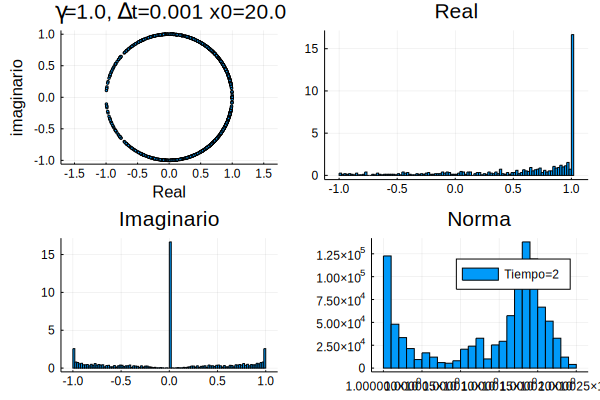

In [10]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
Q1=scatter(real(λ),imag(λ),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) x0=$(x0)")
Q2=histogram(real(λ),normalized=true,title="Real",legend=false,bins=100)
Q3=histogram(imag(λ),normalized=true,title="Imaginario",legend=false,bins=100)
Q4=histogram(abs.(λ),normalized=true,bins=40,label="Tiempo=$(N)",title="Norma")
plot(Q1,Q2,Q3,Q4,layout=l)

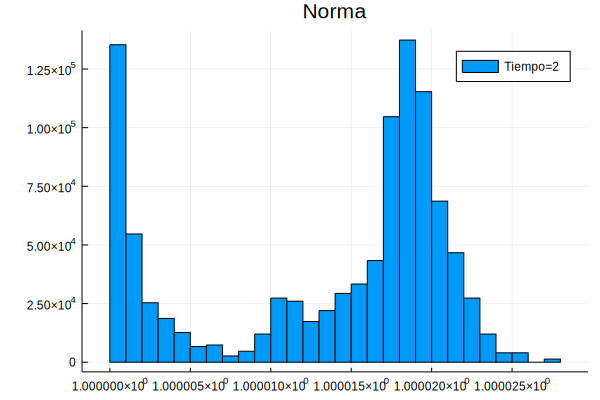

In [20]:
histogram(abs.(λ),normalized=true,bins=40,label="Tiempo=$(N)",title="Norma")

410.886188 seconds (6.37 G allocations: 304.442 GiB, 9.17% gc time)


┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\tesis\Animacion_Prueba_3D_1.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\tesis\\Animacion_Prueba_3D_1.gif")
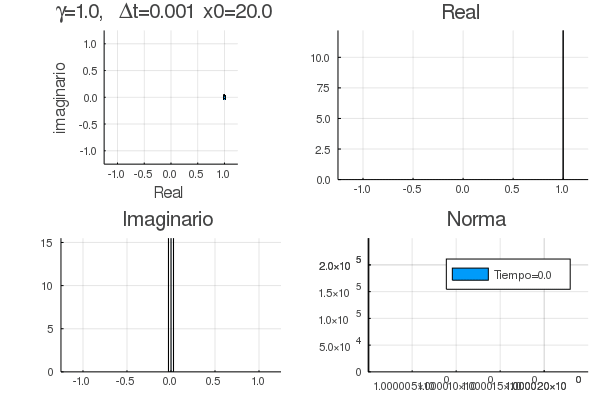

In [21]:
@time begin    
    anim= @animate for j=1:step:length(t)
        λ=lam_eigenvals(γ,x0,Δt,t[1:j],Δs,tiradas);
        l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
        Q3=histogram(imag(λ),normalized=true,title="Imaginario",legend=false,bins=100,xlims=(-1.25,1.25),ylims=(0,15.5))
        Q2=histogram(real(λ),normalized=true,title="Real",legend=false,bins=100,xlims=(-1.25,1.25),ylims=(0,12.2))
        Q1=scatter(real(λ),imag(λ),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) x0=$(x0)",xlims=(-1.25,1.25),ylims=(-1.25,1.25))
        Q4=histogram(abs.(λ),normalized=true,bins=60,label="Tiempo=$(t[j])",title="Norma",xlims=(1,1.000025),ylims=(0,2.5e5))
        plot(Q1,Q2,Q3,Q4,layout=l)
    end
    gif(anim,"./Animacion_Prueba_3D_1.gif", fps=120)
end

In [33]:
function Mat(n::Int64,K::Array{Float64,1},T::Array{Float64,1},Δs::Float64) 
    R=diagm(0 =>ones(3))
    for i=1:n
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)+(0.5*diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)^2))*R
    end
    R
end

Mat (generic function with 2 methods)

In [34]:
function Mat2(n::Int64,K::Array{Float64,1},T::Array{Float64,1}) 
    R=diagm(0 =>ones(3))
    for i=1:n
       R=exp(diagm(1 => [K[i],T[i]],-1 => -[K[i],T[i]]))*R
    end
    R
end

Mat2 (generic function with 1 method)

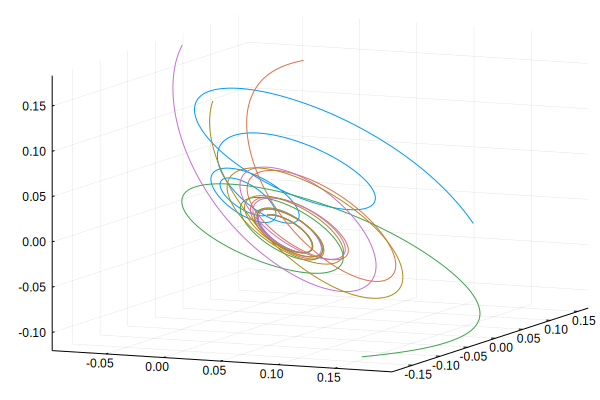

In [89]:
γ=1.0
x0=20.0
Δt=0.001
N=2
t=0:Δt:N
Δs=Δt
K=OUH(x0,γ,t,Δt);
T=OUH(x0,γ,t,Δt)
#T=ones(2001)*5
#K=ones(2001)*5

T_v0=(eigen2(2,K,T,Δs).vectors)[:,1]
N_v0=(eigen2(2,K,T,Δs).vectors)[:,2]*im
B_v0=(eigen2(2,K,T,Δs).vectors)[:,3]
##########################################
T_v=Array{Float64,1}[]
N_v=Array{Float64,1}[]
B_v=Array{Float64,1}[]
for i=1:length(t)
    T_v1=Mat(i,K,T,Δs)*T_v0
    N_v1=Mat(i,K,T,Δs)*N_v0
    B_v1=Mat(i,K,T,Δs)*B_v0
    push!(T_v,real(T_v1))
    push!(N_v,real(N_v1))
    push!(B_v,real(B_v1))
end
T_v=transpose(hcat(T_v...))
N_v=transpose(hcat(N_v...))
B_v=transpose(hcat(B_v...))
##########################################
Tx=T_v[:,1]
Ty=T_v[:,2]
Tz=T_v[:,3]
##########################################
rx=Float64[]
ry=Float64[]
rz=Float64[]
r1x=0.0
r1y=0.0
r1z=0.0
for i=1:length(t)-1
    r1x=Tx[i]*Δs+r1x
    r1y=Ty[i]*Δs+r1y
    r1z=Tz[i]*Δs+r1z
    push!(rx,r1x)
    push!(ry,r1y)
    push!(rz,r1z)
end
plot!(rx,ry,rz,legend=false,lw=1)

In [90]:
savefig("Trayectoria_3D.png")

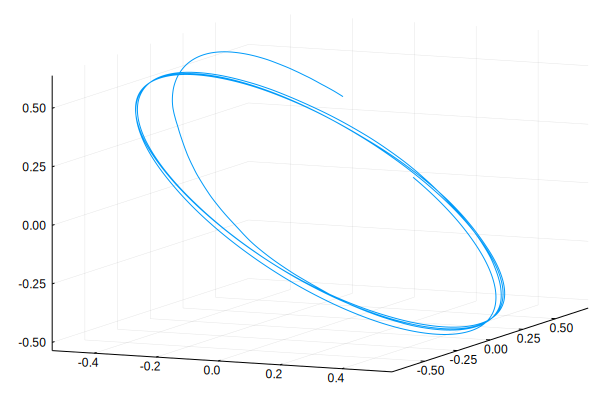

In [93]:
plot(Tx,Ty,Tz,legend=false,lw=1)

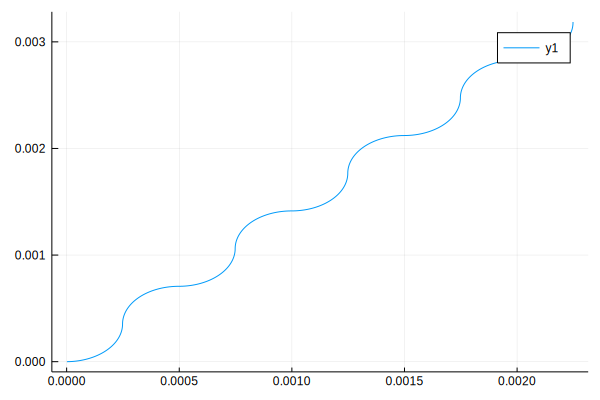

In [93]:
plot(rx,ry)

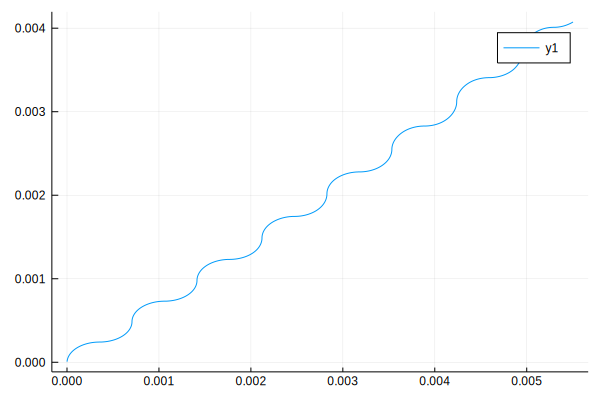

In [51]:
plot(ry,rz)

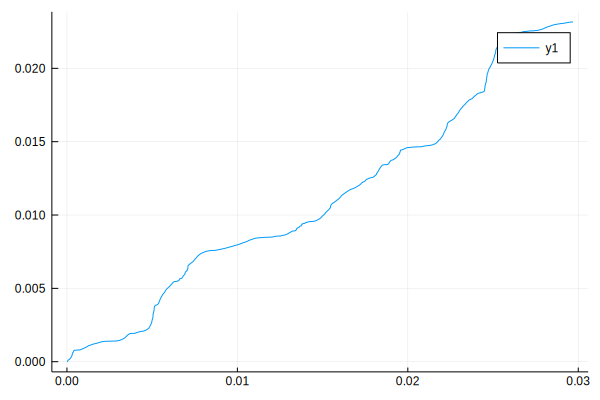

In [43]:
plot(rx,rz)

In [88]:
K

2001-element Array{Float64,1}:
 20.0               
 20.016408994057503 
 20.069918075952227 
 20.016909692983134 
 19.952710179068742 
 19.88623210890366  
 19.941893769931404 
 19.923441296873595 
 19.836226478637258 
 19.820358450730172 
 19.760845942751704 
 19.74507212846541  
 19.77674612245051  
  ⋮                 
  4.593994992956767 
  4.60939516608795  
  4.6431125429810205
  4.719999626168181 
  4.745612856765876 
  4.667361565851892 
  4.708910168174117 
  4.755059989397295 
  4.636296974534931 
  4.649523423547076 
  4.688178997938635 
  4.683882859263547 

In [17]:
x0=1
x=[]
for i=1:10
    x1=1+x0
    push!(x,x1)
end

In [18]:
x

10-element Array{Any,1}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

In [76]:
γ=1.0
x0=20.0
Δt=0.001
N=2
t=0:Δt:N
Δs=Δt
#K=OUH(x0,γ,t,Δt);
#T=OUH(x0,γ,t,Δt)
T=ones(2001)*5
K=ones(2001)*5

T_v0=(eigen(Mat2(2,K,T)).vectors)[:,1]
N_v0=(eigen(Mat2(2,K,T)).vectors)[:,2]*im
B_v0=(eigen(Mat2(2,K,T)).vectors)[:,3]

T_v=Array{Float64,1}[]
N_v=Array{Float64,1}[]
B_v=Array{Float64,1}[]

for i=1:length(t)
    T_v1=Mat2(i,K,T)*T_v0
    N_v1=Mat2(i,K,T)*N_v0
    B_v1=Mat2(i,K,T)*B_v0
    push!(T_v,real(T_v1))
    push!(N_v,real(N_v1))
    push!(B_v,real(B_v1))
end
T_v=transpose(hcat(T_v...))
N_v=transpose(hcat(N_v...))
B_v=transpose(hcat(B_v...))

Tx=T_v[:,1]
Ty=T_v[:,2]
Tz=T_v[:,3]

rx=Float64[]
ry=Float64[]
rz=Float64[]

r1x=0.0
r1y=0.0
r1z=0.0

for i=1:length(t)
    r1x=Tx[i]*Δs+r1x
    r1y=Ty[i]*Δs+r1y
    r1z=Tz[i]*Δs+r1z
    push!(rx,r1x)
    push!(ry,r1y)
    push!(rz,r1z)
end


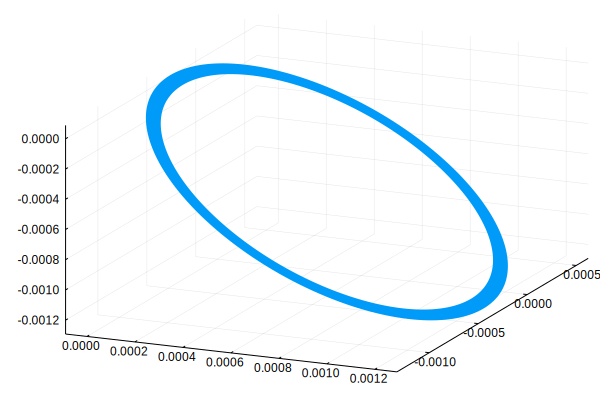

In [78]:
plot(rx,ry,rz,legend=false,camera=(30,50))

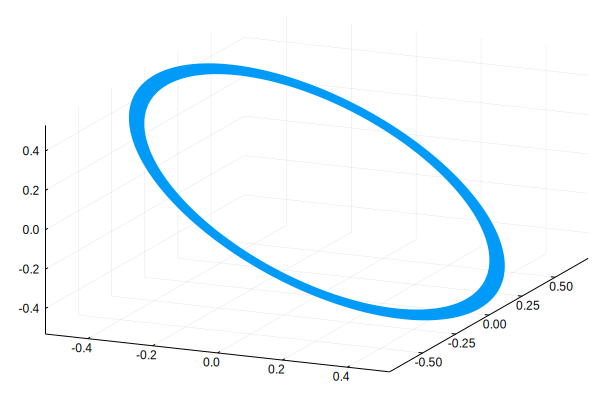

In [77]:
plot(Tx,Ty,Tz,legend=false,camera=(30,50))

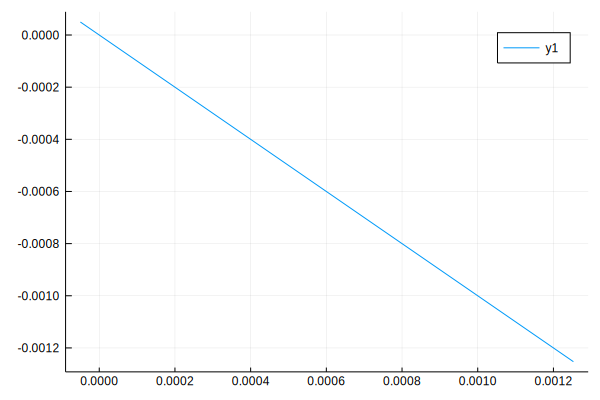

In [74]:
Tx

2001-element Array{Float64,1}:
  0.354430645919021   
  0.4999938280610604  
  0.35090855366100326 
 -0.004968600800035989
 -0.3579177380041789  
 -0.4999444534637663  
 -0.34735180903819285 
  0.009936710948688178
  0.3613694855646917  
  0.49984570914494014 
  0.3437607632805924  
 -0.014903839843024574
 -0.3647855477390598  
  ⋮                   
 -0.11469463918417347 
 -0.4258792920140118  
 -0.48609149474023694 
 -0.25984794416472307 
  0.1195250879899556  
  0.4284614852948175  
  0.4849037351830537  
  0.2555901834502021  
 -0.12434373364387291 
 -0.43100136782676346 
 -0.48366809118149223 
 -0.2513071830993696  